# 1随机森林概述
随机森林是一种集成算法，集成算法是在数据基础上构建多个模型，在多个模型上追求更好表现的算法
## 1.1集成算法

多个模型组成的模型叫做`集成评估器`,组成集成评估器的每个算法叫做`基评估器`

集成算法有三种
* Bagging 装袋法，构建多个相互独立的基评估器，然后对预测进行平均或投票表决原则来决定集成评估器的结果，代表是`随机森林`
* Boosting 提升法，基评估器是相关的，按顺序一一构成。核心思想是结合弱评估器的力量一次次的对难以评估的样本进行预测，从而组成一个强评估器，代表是`Adbboost`
* stacking

## 1.2 sklearn中的集成算法
* `ensemble`

# 2.1 sklearn中的随机森林 RandomForestClassifier
```python
sklearn.ensemble.RandomForestClassifier

class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
```
## 2.1重要参数
### 2.1.1控制基评估器重要参数
* criterion  不纯度的衡量指标，基尼系数和信息熵
* max_depth  最大深度
* min_samples_leaf  一个节点在分支后必须含有min_samples_leaf个训练样本才分支，否则不分支
* min_samples_split  一个几点必须含有min_samples_split训练样本才能分支，否则不分枝
* max_features  限制分支时考虑的特征个数
* min_impurity_decrease  限制信息增益的大小

### 2.1.2 n_estimators
控制基评估器的数量。这个参数对随机森林的影响是单调的，也就是说通常n_estimators越大结果越好

In [1]:
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [3]:
wine = load_wine()

In [4]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [6]:
wine.data.shape

(178, 13)

In [8]:
wine.target.shape

(178,)

流程
* 实例化
* 训练集带入实例化的模型进行训练--fit
* 使用其他接口将测试集导入训练好的模型，获取结果(score, Y_test)

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(wine.data, wine.target, test_size=0.3)

In [13]:
clf = DecisionTreeClassifier(random_state=33)  # 决策树, 实例化
rlf = RandomForestClassifier(random_state=33)  # 随机森林, 实例化

clf = clf.fit(Xtrain, ytrain)  # 决策树, 训练数据
rlf = rlf.fit(Xtrain, ytrain)  # 随机森林, 训练数据

score_c = clf.score(Xtest, ytest)  # 决策树, 结果
score_r = rlf.score(Xtest, ytest)  # 随机森林, 结果
print("决策树得分: {c}".format(c=score_c),
     "随机森林得分: {r}".format(r=score_r))

决策树得分: 0.9444444444444444 随机森林得分: 0.9814814814814815


In [18]:
# 交叉验证
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [23]:
rlf = RandomForestClassifier(n_estimators=200)
rlf_s = cross_val_score(rlf, wine.data, wine.target, cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf, wine.data, wine.target, cv=10)

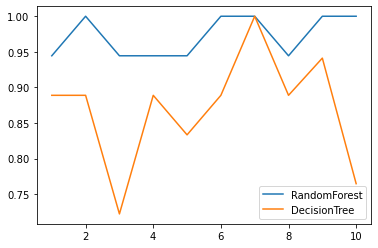

In [24]:
plt.plot(range(1,11), rlf_s, label='RandomForest')
plt.plot(range(1,11), clf_s, label='DecisionTree')
plt.legend()

0.9888888888888889 26


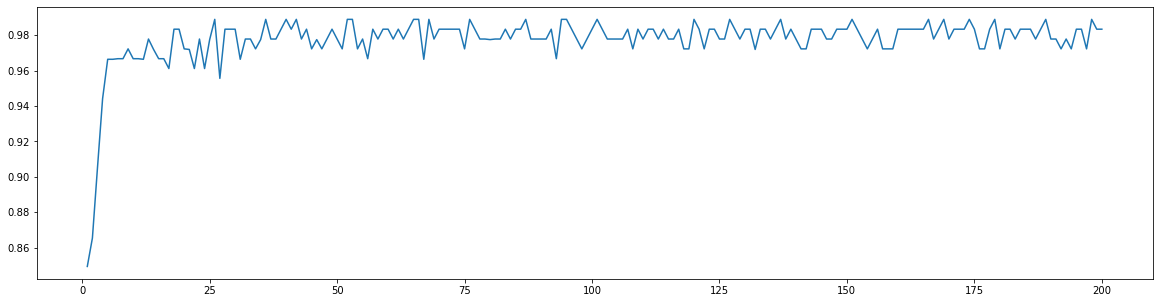

In [26]:
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i + 1, n_jobs=1)
    rfc_s = cross_val_score(rfc, wine.data, wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa), superpa.index(max(superpa))+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201), superpa)
plt.show()